In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Uber Request Data.csv") # parse_dates=['Request timestamp', 'Drop timestamp']

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
len(df["Request id"].unique()) == df.shape[0] # to check whether the "Request id" has all unique values or not

True

In [6]:
df.shape

(6745, 6)

In [7]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
# % of null values
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [9]:
df.info() # Driver id and Drop timestamo has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [10]:
df["Request timestamp"].value_counts() 

11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
11/7/2016 21:38        5
                      ..
12/7/2016 19:38        1
15-07-2016 19:24:14    1
15-07-2016 07:57:58    1
15-07-2016 08:06:06    1
13-07-2016 22:57:04    1
Name: Request timestamp, Length: 5618, dtype: int64

In [11]:
df["Request timestamp"]=df["Request timestamp"].astype(str) # chanding the column data type to string

In [12]:
df["Request timestamp"].dtype # 'O' means Object ie the collection of string

dtype('O')

In [13]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [14]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True) 
#'dayfirst' means day will come before month in date format

In [15]:
df["Request timestamp"]

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [16]:
df["Drop timestamp"].head()

0        11/7/2016 13:00
1        11/7/2016 18:47
2         12/7/2016 9:58
3        12/7/2016 22:03
4    13-07-2016 09:25:47
Name: Drop timestamp, dtype: object

In [17]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [20]:
request_hour=df["Request timestamp"].dt.hour
# request_hour is the hour of the day during which the client has made the cab request

In [22]:
len(request_hour)

6745

In [23]:
df["request_hour"]=request_hour

In [24]:
request_day=df["Request timestamp"].dt.day

In [26]:
df["request_day"]=request_day

In [27]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hour,request_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [28]:
import  seaborn as sns

In [29]:
import matplotlib.pyplot as plt

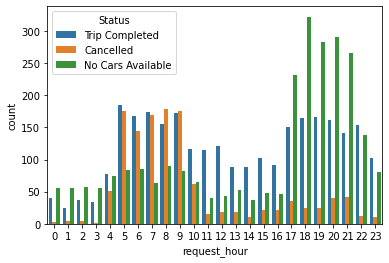

In [30]:
sns.countplot(x="request_hour",data=df,hue="Status")
plt.show()

C:\Users\om\anaconda3\envs\machine_learning_updated\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


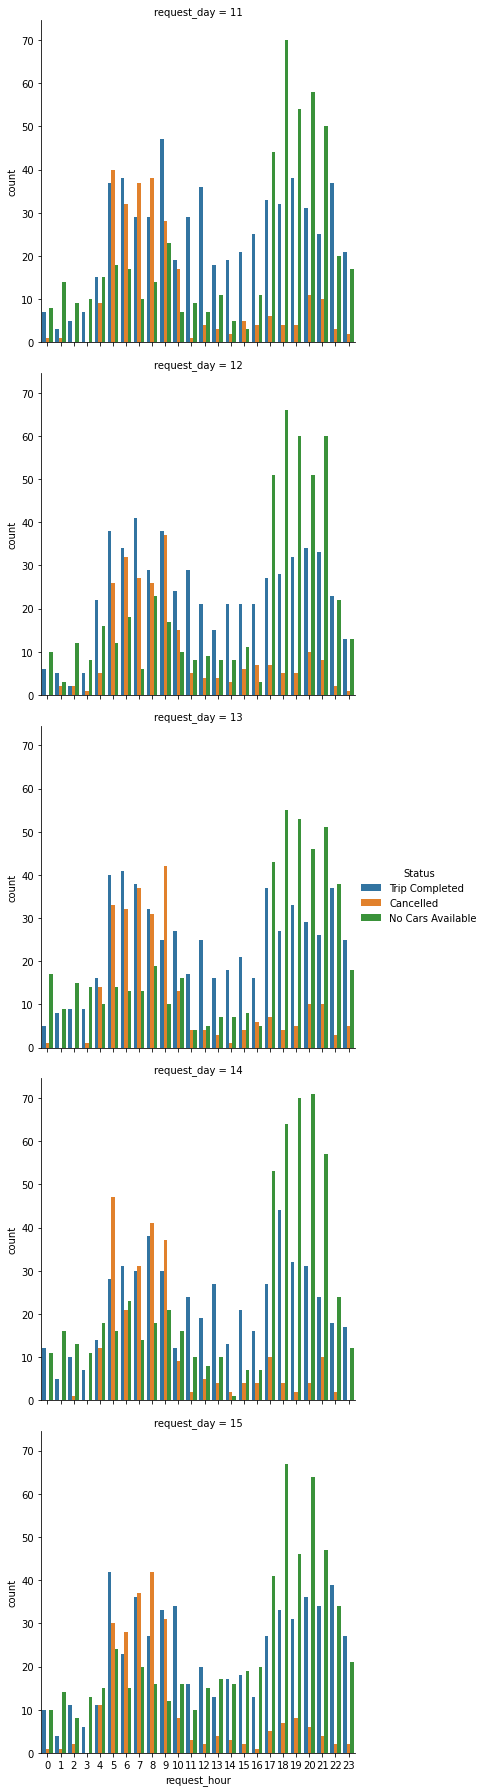

In [39]:
sns.factorplot(x="request_hour",data=df,row="request_day",hue="Status",kind="count")
plt.show()

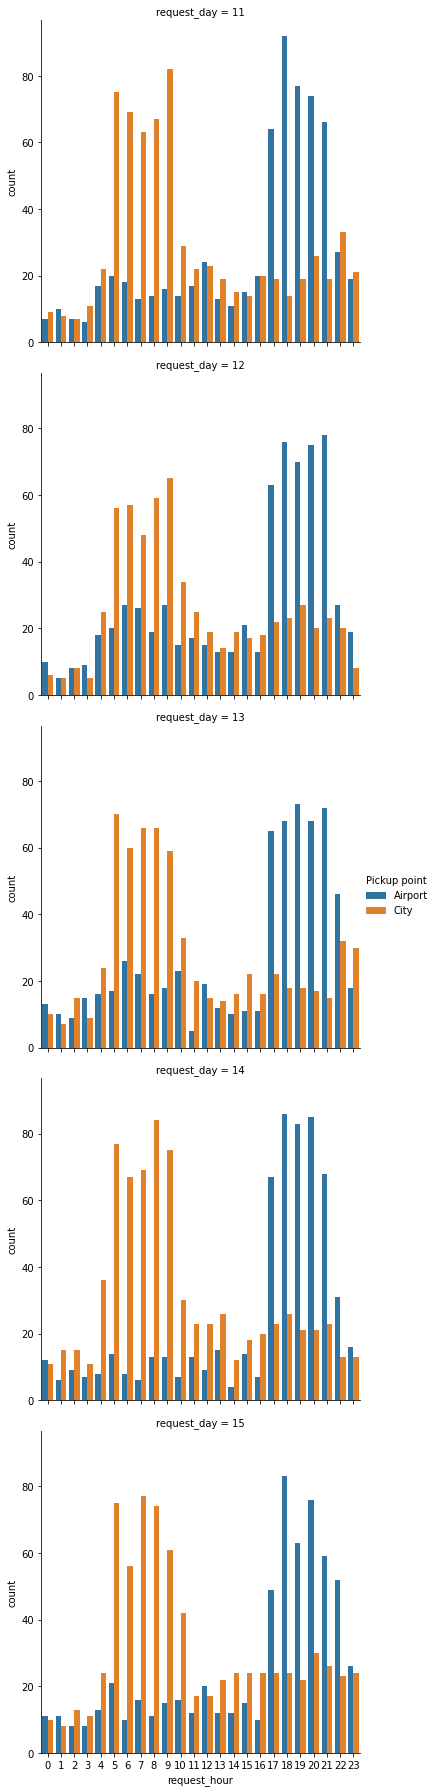

In [42]:
sns.factorplot(x="request_hour",data=df,row="request_day",hue="Pickup point",kind="count")
plt.show()

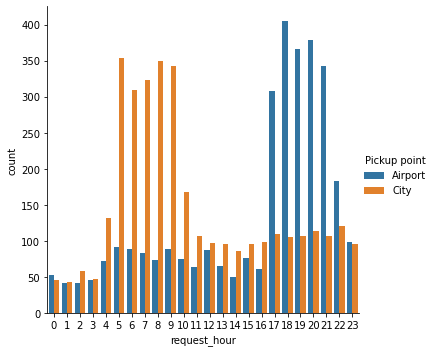

In [41]:
sns.factorplot(x="request_hour",data=df,hue="Pickup point",kind="count")
plt.show()

In [77]:
j=0
for i in df["request_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1

In [78]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hour,request_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [79]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

In [81]:
df["Time_Slot"].count()

6745

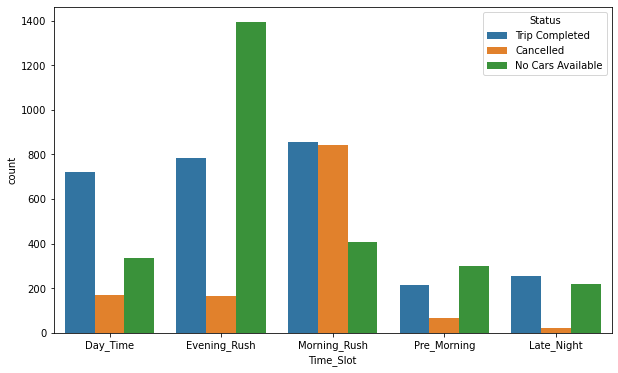

In [152]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=df)
plt.show()

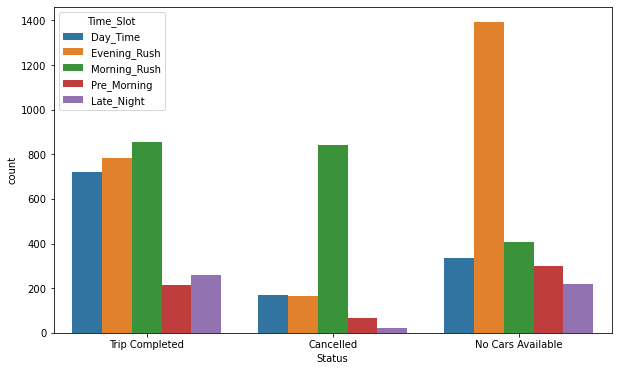

In [153]:
plt.figure(figsize=(10,6))
sns.countplot(x="Status",hue="Time_Slot",data=df)
plt.show()

# Supply and demand for Pre Morning

In [163]:
df_pre_morning = df[df.Time_Slot == 'Pre_Morning']
df_pre_morning.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hour,request_day,Time_Slot
12,2784,Airport,2.0,Trip Completed,2016-07-13 04:49:20,2016-07-13 05:23:03,4,13,Pre_Morning
26,5434,City,3.0,Trip Completed,2016-07-15 02:41:38,2016-07-15 03:24:43,2,15,Pre_Morning
34,4075,City,4.0,Trip Completed,2016-07-14 02:17:35,2016-07-14 03:21:38,2,14,Pre_Morning
53,4081,Airport,6.0,Trip Completed,2016-07-14 02:37:14,2016-07-14 03:30:27,2,14,Pre_Morning
56,6758,Airport,6.0,Trip Completed,2016-07-15 00:03:39,2016-07-15 01:07:39,0,15,Pre_Morning


In [179]:
df_pre_morning['Status'].value_counts()

No Cars Available    299
Trip Completed       214
Cancelled             65
Name: Status, dtype: int64

In [187]:
dataframe_pre_morning = pd.DataFrame(df_pre_morning['Status'].value_counts())
dataframe_pre_morning

,Status
No Cars Available,299
Trip Completed,214
Cancelled,65


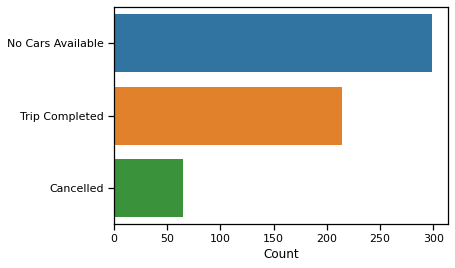

In [197]:
ax = sns.barplot(x= 'Status',y = dataframe_pre_morning.index, data = dataframe_pre_morning)
ax.set_xlabel("Count")
plt.show()

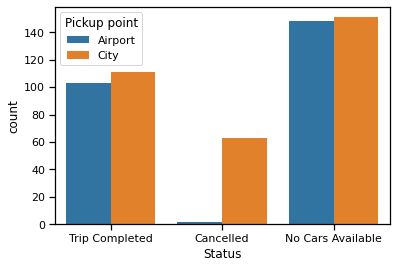

In [173]:
sns.countplot(x='Status', data = df_pre_morning, hue = 'Pickup point')

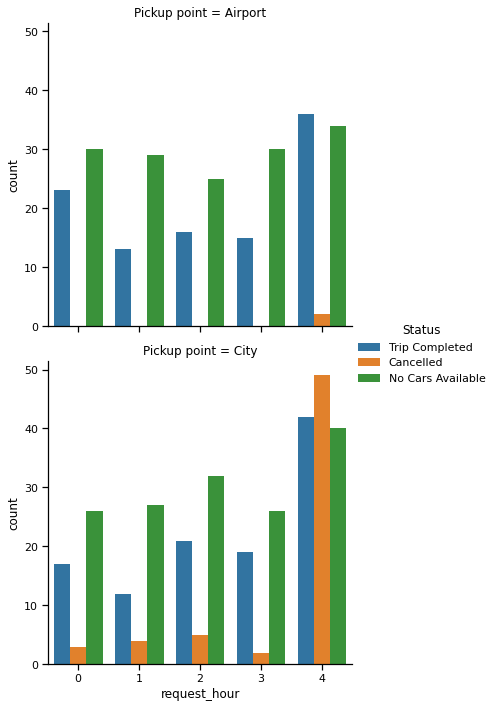

In [198]:
sns.catplot(x='request_hour', data = df_pre_morning, hue = 'Status', row ='Pickup point', kind = 'count')

# Severity of problem by location and their count (cancellation of cab as per the pickup location at morning rush hours)

In [88]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']


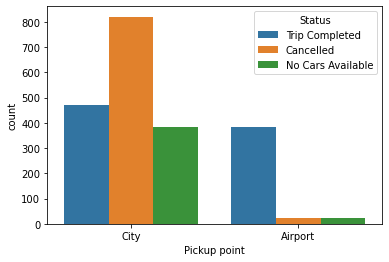

In [89]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

In [100]:
df_morning_rush['Pickup point'].unique()

array(['City', 'Airport'], dtype=object)

In [95]:
# For Pickup point = 'Airport' and Status = Cancelled

# df_airport_cancelled=df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]
# or
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]
df_airport_cancelled.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hour,request_day,Time_Slot
2841,1867,Airport,3.0,Cancelled,2016-07-12 09:59:00,NaT,9,12,Morning_Rush
2909,1462,Airport,23.0,Cancelled,2016-07-12 05:01:00,NaT,5,12,Morning_Rush
2910,196,Airport,24.0,Cancelled,2016-07-11 06:07:00,NaT,6,11,Morning_Rush
2944,5847,Airport,31.0,Cancelled,2016-07-15 09:05:38,NaT,9,15,Morning_Rush
3130,2844,Airport,74.0,Cancelled,2016-07-13 05:28:12,NaT,5,13,Morning_Rush


In [91]:
df_airport_cancelled.shape[0]

23

In [154]:
# For Pickup point = 'City' and Status = 'Cancelled'

df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]

In [155]:
df_city_cancelled.shape[0]

820

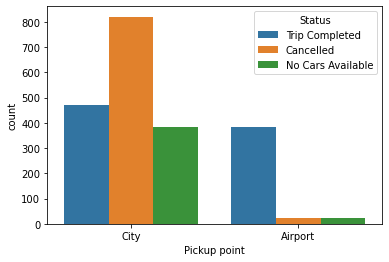

In [156]:
sns.countplot(x='Pickup point', data = df_morning_rush, hue = 'Status')

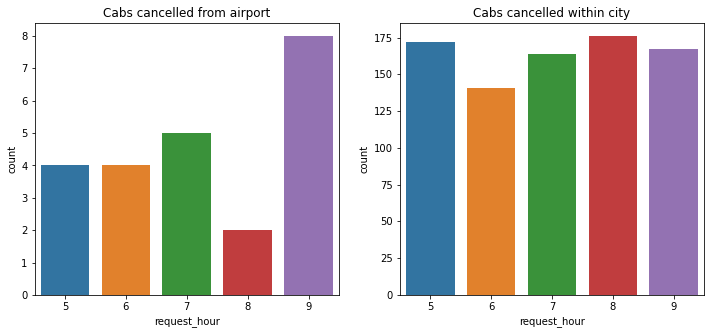

In [157]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ax=sns.countplot(x='request_hour', data = df_airport_cancelled)
ax.set_title('Cabs cancelled from airport')

plt.subplot(1,2,2)
ax=sns.countplot(x='request_hour', data = df_city_cancelled)
ax.set_title('Cabs cancelled within city')
plt.show()

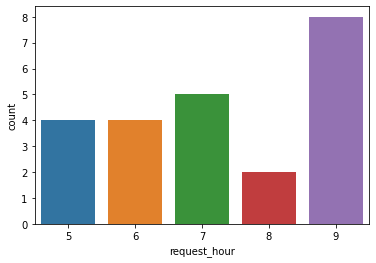

In [150]:
sns.countplot(x='request_hour', data = df_airport_cancelled)

# Supply and demand for Morning rush

In [200]:
df_morning_rush.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hour,request_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush


In [206]:
df_morning_rush.Status.value_counts()

Trip Completed       854
Cancelled            843
No Cars Available    406
Name: Status, dtype: int64

In [209]:
dataframe_morning_rush = pd.DataFrame(df_morning_rush.Status.value_counts())
dataframe_morning_rush

,Status
Trip Completed,854
Cancelled,843
No Cars Available,406


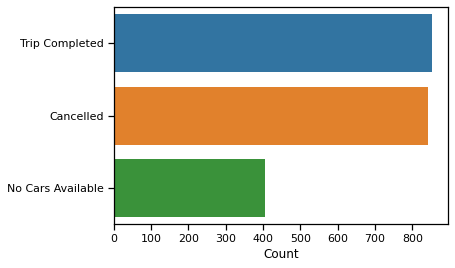

In [210]:
# Inference: Cancelled trips are approx equivalent to Trip Competed

ax = sns.barplot(x= 'Status',y = dataframe_morning_rush.index, data = dataframe_morning_rush)
ax.set_xlabel("Count")
plt.show()

In [124]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [125]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [126]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [127]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

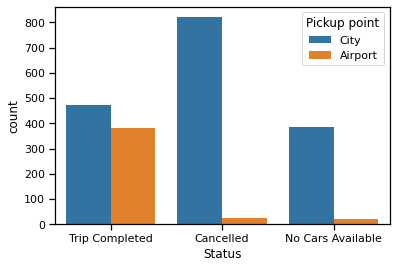

In [212]:
sns.countplot(x= 'Status', data = df_morning_rush, hue = 'Pickup point')

#### Inference: major issue is within the city as Uber is not able to fulfil the demand. There is huge shortage of cabs within city during Morning rush

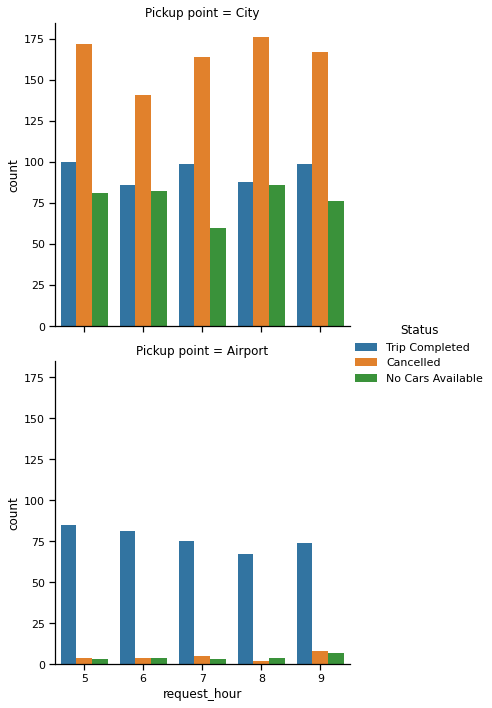

In [214]:
sns.catplot(x='request_hour', data = df_morning_rush, hue = 'Status', row ='Pickup point', kind = 'count')
plt.show()

In [140]:
df_morning_rush[df_morning_rush["Pickup point"]=="Airport"]["Status"].value_counts()

Trip Completed       382
Cancelled             23
No Cars Available     21
Name: Status, dtype: int64

In [141]:
df_morning_rush[df_morning_rush["Pickup point"]=="City"]["Status"].value_counts()

Cancelled            820
Trip Completed       472
No Cars Available    385
Name: Status, dtype: int64

# Supply and Demand for Day time

In [230]:
df_day_time = df[df['Time_Slot']=='Day_Time']
df_day_time.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hour,request_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,12,12,Day_Time
14,3379,City,2.0,Trip Completed,2016-07-13 14:23:02,2016-07-13 15:35:18,14,13,Day_Time
16,4652,City,2.0,Trip Completed,2016-07-14 12:01:02,2016-07-14 12:36:46,12,14,Day_Time
18,535,Airport,3.0,Trip Completed,2016-07-11 10:00:00,2016-07-11 10:31:00,10,11,Day_Time


In [231]:
df_day_time.shape

(1224, 9)

In [ ]:
dhdskjjdcjjndjdsjdskdsdskjdkjbdskjkdsjnsddcjndskdskjcbdskd

In [233]:
df_day_time.Status.value_counts()

Trip Completed       722
No Cars Available    334
Cancelled            168
Name: Status, dtype: int64

In [235]:
dataframe_day_time =  pd.DataFrame(df_day_time.Status.value_counts())
dataframe_day_time

,Status
Trip Completed,722
No Cars Available,334
Cancelled,168


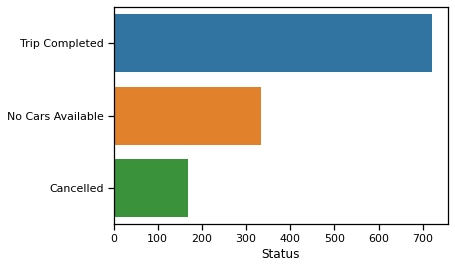

In [237]:
sns.barplot(x=dataframe_day_time.Status, y = dataframe_day_time.index, data = dataframe_day_time)
plt.show()

# Supply and Demand for evening rush

In [215]:
df_evening_rush=df[df['Time_Slot']=='Evening_Rush']


In [216]:
df_evening_rush.Status.value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [219]:
dataframe_evening_rush = pd.DataFrame(df_evening_rush.Status.value_counts())
dataframe_evening_rush

,Status
No Cars Available,1392
Trip Completed,784
Cancelled,166


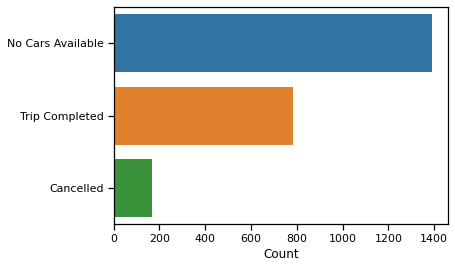

In [220]:
# Inference: Availibility of cars is the major concern during Evening rush hours

ax = sns.barplot(x= 'Status',y = dataframe_evening_rush.index, data = dataframe_evening_rush)
ax.set_xlabel("Count")
plt.show()

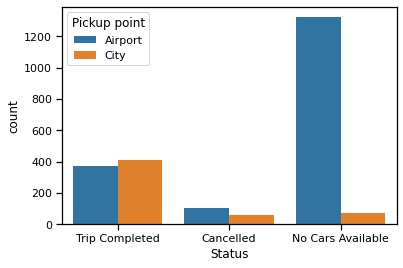

In [223]:
sns.countplot(x= 'Status', data = df_evening_rush, hue = 'Pickup point')

#### Inference: Availability of cars is an major concern at airports

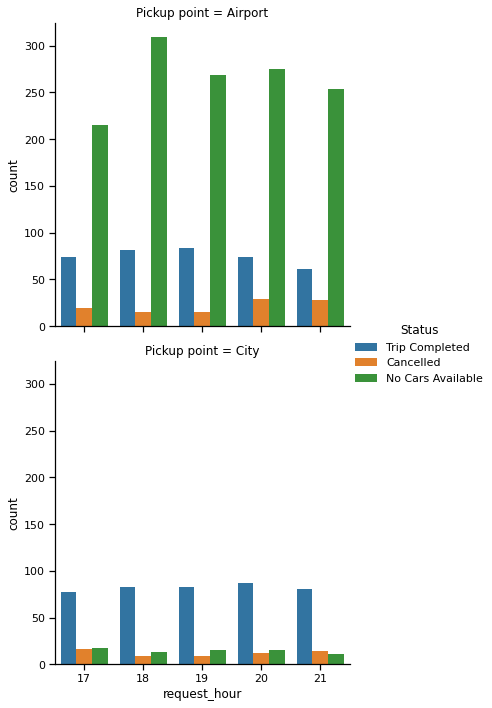

In [224]:
sns.catplot(x='request_hour', data = df_evening_rush, hue = 'Status', row ='Pickup point', kind = 'count')
plt.show()

In [132]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]

In [134]:
df_city_cancelled.shape[0]

60

In [226]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [143]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [144]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [145]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

# Severity problem at each location by looking at cancellation of cabs in each of the pickup location

In [128]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [129]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

# Severity of problem by location in morning rush